<a href="https://colab.research.google.com/github/HarshiniR4/NYC-Taxi-EDA-Project/blob/main/NYC_Taxi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data analytics of the New York Taxi Trip Duration Dataset**

In [ ]:

#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
#setting the working file

df=pd.read_csv("NYC_train.csv")

In [ ]:
#Number of rows and columns
print("Rows:", format(df.shape[0]))
print("Columns: ", format(df.shape[1]))
df.info()
df.head()

Rows: 53373
Columns:  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53373 entries, 0 to 53372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  53373 non-null  object 
 1   vendor_id           53373 non-null  int64  
 2   pickup_datetime     53373 non-null  object 
 3   dropoff_datetime    53372 non-null  object 
 4   passenger_count     53372 non-null  float64
 5   pickup_longitude    53372 non-null  float64
 6   pickup_latitude     53372 non-null  float64
 7   dropoff_longitude   53372 non-null  float64
 8   dropoff_latitude    53372 non-null  float64
 9   store_and_fwd_flag  53372 non-null  object 
 10  trip_duration       53372 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,53373.000000,53372.000000,53372.000000,53372.000000,53372.000000,53372.000000,53372.000000
mean,1.530268,1.669077,-73.973497,40.751198,-73.973410,40.752025,947.335045
std,0.499088,1.317468,0.037970,0.027970,0.036601,0.032448,3138.634313
min,1.000000,1.000000,-74.393555,40.449749,-74.398514,40.444698,1.000000
25%,1.000000,1.000000,-73.991814,40.737549,-73.991379,40.736050,394.000000
50%,2.000000,1.000000,-73.981659,40.754419,-73.979721,40.754620,659.000000
75%,2.000000,2.000000,-73.967110,40.768526,-73.962896,40.770012,1072.000000
max,2.000000,6.000000,-73.518051,41.091171,-72.711395,41.311520,86357.000000


In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count       float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [ ]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'],  errors='coerce')

In [ ]:
df.count()

id                    53373
vendor_id             53373
pickup_datetime       53373
dropoff_datetime      53372
passenger_count       53372
pickup_longitude      53372
pickup_latitude       53372
dropoff_longitude     53372
dropoff_latitude      53372
store_and_fwd_flag    53372
trip_duration         53372
dtype: int64

In [ ]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    53373
pickup_datetime       53373
dropoff_datetime      53372
store_and_fwd_flag    53372
dtype: int64


In [ ]:
# Making a list of missing value types
#Look at your missing data 
missing_data = df.isnull()
missing_data.head()
missing_data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
53368,False,False,False,False,False,False,False,False,False,False,False
53369,False,False,False,False,False,False,False,False,False,False,False
53370,False,False,False,False,False,False,False,False,False,False,False
53371,False,False,False,False,False,False,False,False,False,False,False
53372,False,False,False,True,True,True,True,True,True,True,True


In [ ]:
#Using a for loop in Python to figure out the number of missing values in each column
for column in missing_data.columns.values.tolist(): 
    print(column)
    print(missing_data[column].value_counts())
    print("") 

id
False    53373
Name: id, dtype: int64

vendor_id
False    53373
Name: vendor_id, dtype: int64

pickup_datetime
False    53373
Name: pickup_datetime, dtype: int64

dropoff_datetime
False    53372
True         1
Name: dropoff_datetime, dtype: int64

passenger_count
False    53372
True         1
Name: passenger_count, dtype: int64

pickup_longitude
False    53372
True         1
Name: pickup_longitude, dtype: int64

pickup_latitude
False    53372
True         1
Name: pickup_latitude, dtype: int64

dropoff_longitude
False    53372
True         1
Name: dropoff_longitude, dtype: int64

dropoff_latitude
False    53372
True         1
Name: dropoff_latitude, dtype: int64

store_and_fwd_flag
False    53372
True         1
Name: store_and_fwd_flag, dtype: int64

trip_duration
False    53372
True         1
Name: trip_duration, dtype: int64



In [ ]:
#drop.na method 
df.dropna(subset = ["dropoff_latitude"], axis = 0, inplace = True)

#Double Check to see if there's still missing data 
df["dropoff_latitude"].isnull().count()

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)


#Observe your new data - There's no more missing values 
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
53367,id2689669,1,2016-03-17 07:41:05,2016-03-17 07:49:23,1.0,-73.990852,40.750519,-73.976112,40.748726,N,498.0
53368,id0060914,2,2016-01-08 18:42:52,2016-01-08 18:52:54,1.0,-74.003471,40.732273,-74.002708,40.760609,N,602.0
53369,id1894842,2,2016-03-07 07:48:34,2016-03-07 08:01:00,1.0,-73.976677,40.739723,-73.992165,40.749184,N,746.0
53370,id3464464,1,2016-05-20 12:20:42,2016-05-20 12:31:47,1.0,-73.998489,40.717159,-74.011658,40.713718,N,665.0
53371,id1968289,2,2016-06-08 20:46:58,2016-06-08 20:53:48,1.0,-74.003838,40.738350,-74.000092,40.728531,N,410.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53372 entries, 0 to 53371
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  53372 non-null  object        
 1   vendor_id           53372 non-null  int64         
 2   pickup_datetime     53372 non-null  datetime64[ns]
 3   dropoff_datetime    53372 non-null  datetime64[ns]
 4   passenger_count     53372 non-null  float64       
 5   pickup_longitude    53372 non-null  float64       
 6   pickup_latitude     53372 non-null  float64       
 7   dropoff_longitude   53372 non-null  float64       
 8   dropoff_latitude    53372 non-null  float64       
 9   store_and_fwd_flag  53372 non-null  object        
 10  trip_duration       53372 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.5+ MB


In [ ]:
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [ ]:
df['trip_duration'].describe()

count    53372.000000
mean       947.335045
std       3138.634313
min          1.000000
25%        394.000000
50%        659.000000
75%       1072.000000
max      86357.000000
Name: trip_duration, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


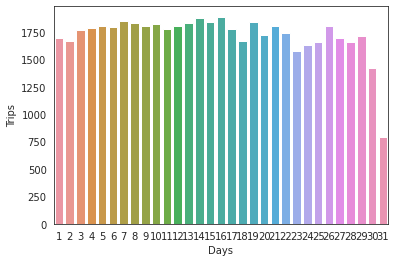

In [ ]:
ax = sns.countplot(df.pickup_datetime.dt.day)
ax.set(xlabel='Days', ylabel='Trips')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


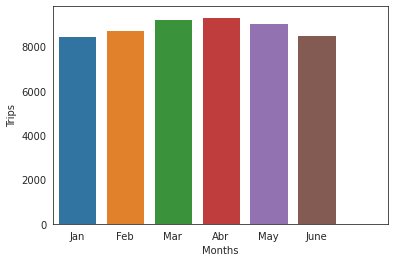

In [ ]:
ax=sns.countplot(df.dropoff_datetime.dt.month)
ax.set(xlabel='Months', ylabel='Trips', xticklabels=['Jan', 'Feb', 'Mar', 'Abr', 'May', 'June'])
plt.show()

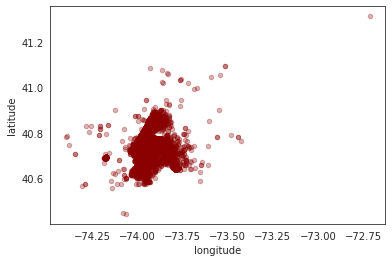

In [ ]:
longitude=list(df.pickup_longitude) +list(df.dropoff_longitude)
latitude=list(df.pickup_latitude) +list(df.dropoff_latitude)
data = pd.DataFrame({'latitude': latitude, 'longitude': longitude})
sns.set_style("white")
ax = sns.regplot(
    x="longitude", 
    y="latitude", 
    data=data, 
    scatter=True, 
    fit_reg=False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":20}
)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


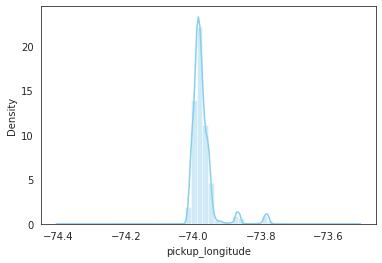

In [ ]:
sns.distplot(df['pickup_longitude'], color="skyblue")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


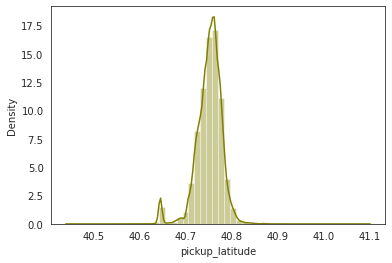

In [ ]:
sns.distplot(df['pickup_latitude'], color="olive")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


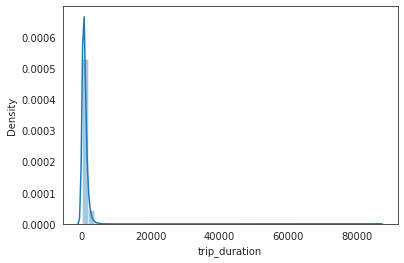

In [ ]:
sns.distplot(df['trip_duration'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


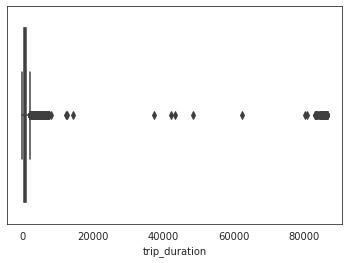

In [ ]:
sns.boxplot(df['trip_duration'] )

In [ ]:
print( df['trip_duration'].nlargest(10))
print( df['trip_duration'].nsmallest(10))

6513     86357.0
1865     86352.0
43633    86352.0
21304    86345.0
38815    86344.0
21846    86343.0
41687    86329.0
46882    86327.0
15063    86315.0
41294    86310.0
Name: trip_duration, dtype: float64
35196    1.0
1107     2.0
6777     2.0
32760    2.0
37688    2.0
43247    2.0
47456    2.0
48111    2.0
842      3.0
1960     3.0
Name: trip_duration, dtype: float64


In [ ]:
print('Mean:')
print(df['trip_duration'].mean())
print('Median:')
print(df['trip_duration'].median())
print('Std Deviation:')
print(df['trip_duration'].std())

Mean:
947.3350445926703
Median:
659.0
Std Deviation:
3138.634313000997


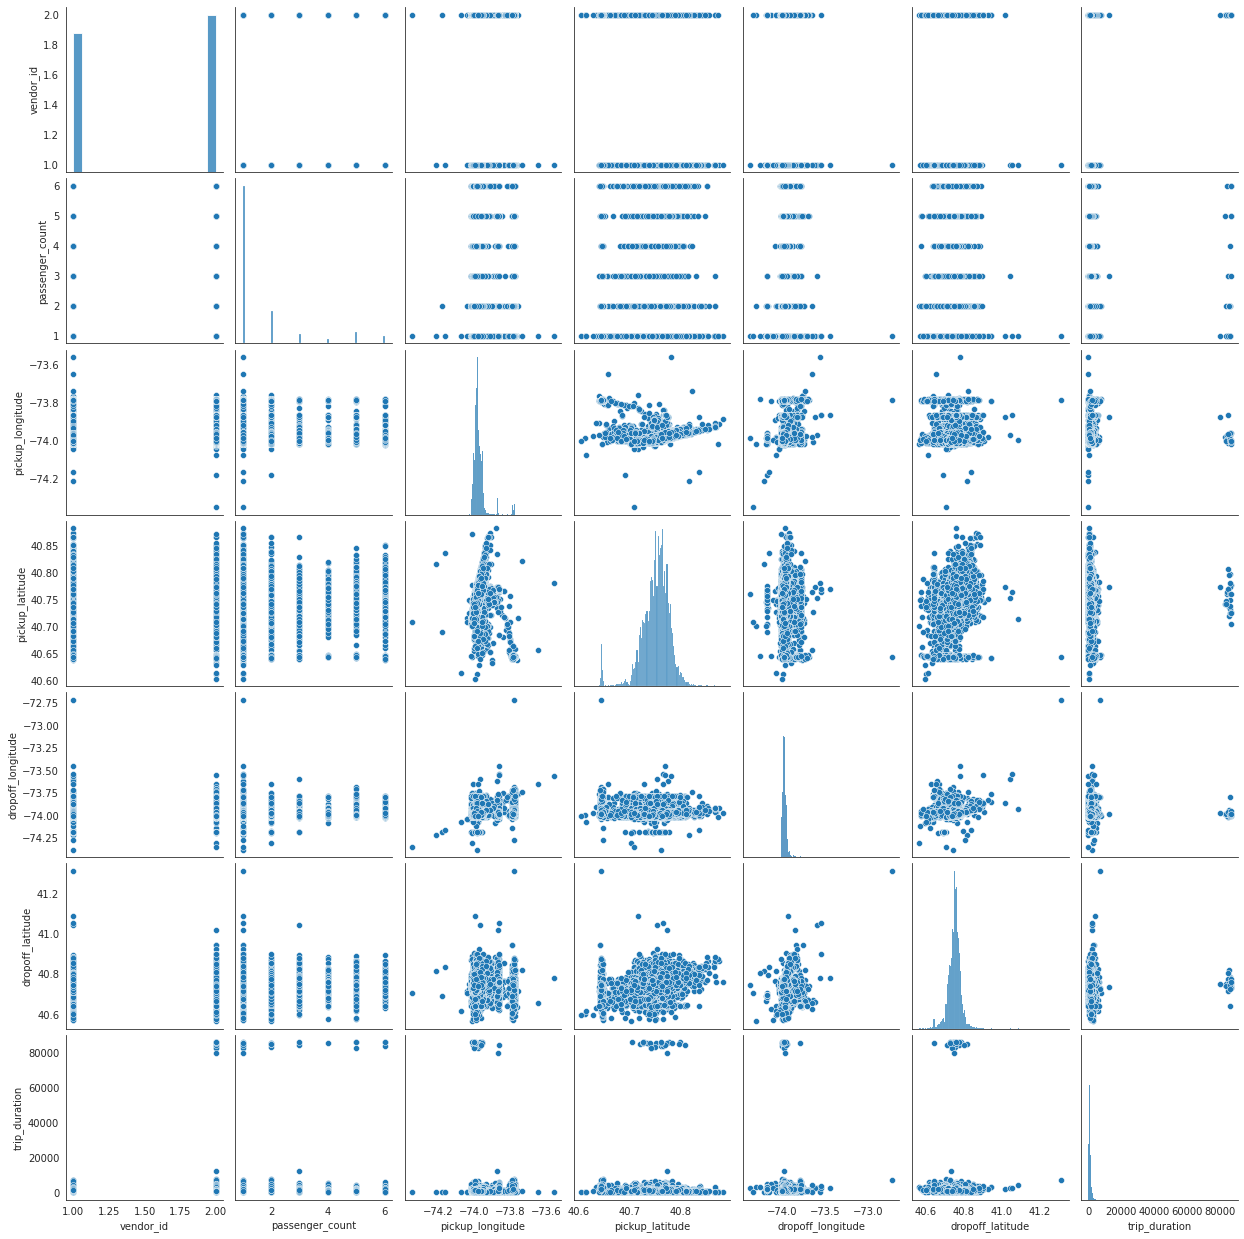

In [ ]:
sns.pairplot(df, palette="rainbow")